In [1]:
# Module
import pandas as pd
import numpy as np
import os
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from plotnine import *

Duplicate key in file WindowsPath('c:/Python38/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  sans-serif')


In [2]:
# Setting Warning MSG
warnings.filterwarnings(action = 'ignore')

# Setting DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.options.display.float_format = '{:,.0f}'.format

# Setting Font
mpl.rcParams['axes.unicode_minus'] = False

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf') 
nanum_font_list = [_ for _ in font_list if 'Nanum' in _]
font_path = nanum_font_list[0]

fontprop = fm.FontProperties(fname=font_path, size=12)

In [3]:
# Load Data
df_2013_2015 = pd.read_csv('2013-2015.csv')
df_2015_2018 = pd.read_csv('2015-2018.csv')

df_2013_2018 = pd.concat([df_2013_2015, df_2015_2018])

# Check Data
df_2013_2018.shape
df_2013_2018.head()
df_2013_2018.tail()

# Data Purification
df_2013_2015_region = df_2013_2015['지역명'].unique()
df_2015_2018_region = df_2015_2018['지역명'].unique()
df_2013_2018 = df_2013_2018.dropna()
df_2013_2018.isnull().sum()

exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region]

df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명']==''].index, axis=0, inplace=True)

df_2013_2018.지역명.unique()
df_2013_2018.info()
df_2013_2018['연도'] = df_2013_2018['연도'].astype(str)
df_2013_2018['월'] = df_2013_2018['월'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 1 to 560
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     876 non-null    object 
 1   연도      876 non-null    int64  
 2   월       876 non-null    int64  
 3   평당분양가격  876 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 34.2+ KB


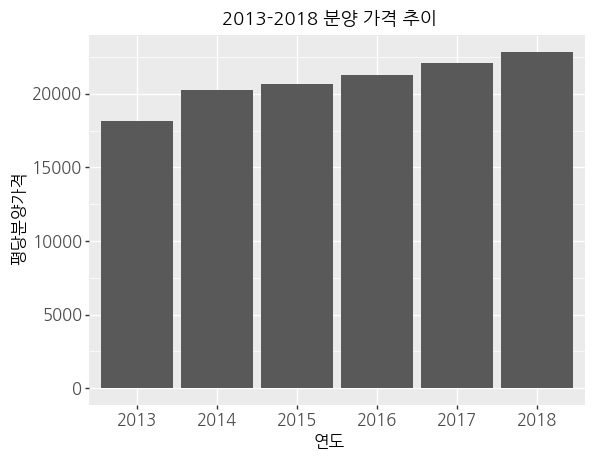

<ggplot: (147073542123)>

In [4]:
# 2013-2018 개괄적 분양 가격 추이
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2013-2018 분양 가격 추이')
 + theme(text=element_text(fontproperties=fontprop))
)

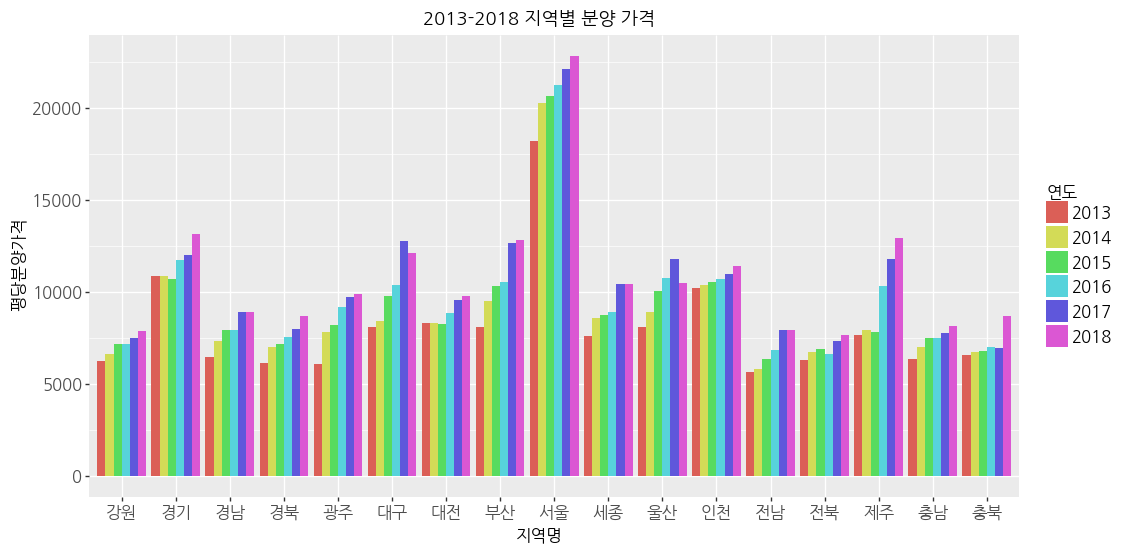

<ggplot: (147076027260)>

In [5]:
# 2013-2018 지역별 분양 가격 시각화 ; BarPlot
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2013-2018 지역별 분양 가격')
 + theme(text=element_text(fontproperties=fontprop),
         figure_size=(12, 6))
)

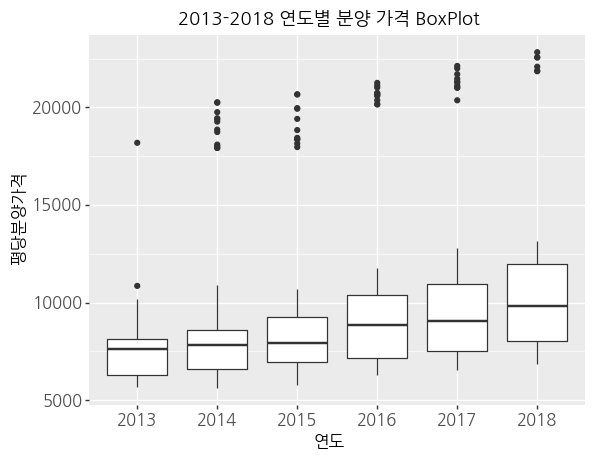

<ggplot: (147075943952)>

In [6]:
# 2013-2018 연도별 분양 가격 이상치 시각화 ; BoxPlot
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + ggtitle('2013-2018 연도별 분양 가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop))
)

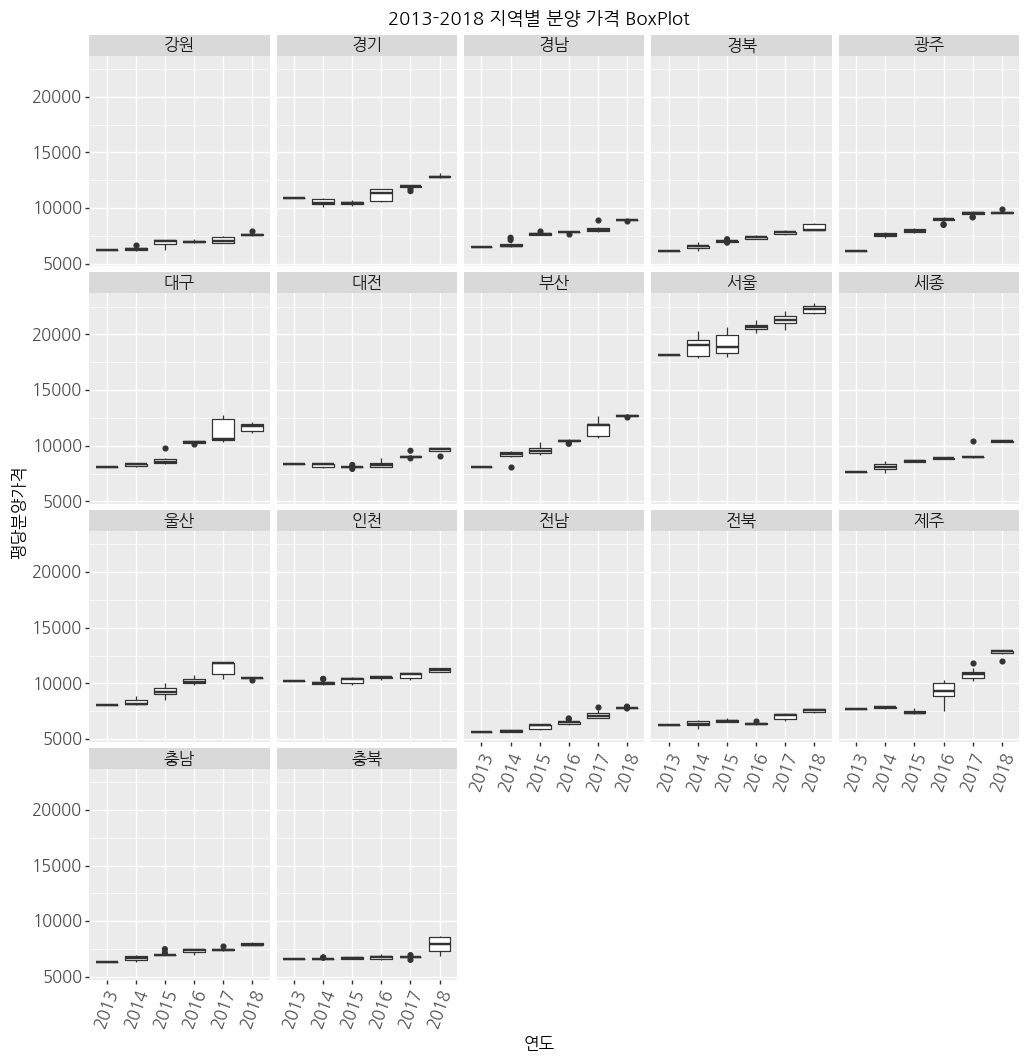

<ggplot: (147076050158)>

In [7]:
# 2013-2018 지역별 분양 가격 이상치 시각화 ; BoxPlot
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + ggtitle('2013-2018 지역별 분양 가격 BoxPlot')
 + facet_wrap('지역명')
 + theme(text=element_text(fontproperties=fontprop),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

In [8]:
# To CSV
df_2013_2018.to_csv('2013-2018.csv', index=False)